<a href="https://www.kaggle.com/code/ashrafultauhid/spotify-music-dataset-2000-2023?scriptVersionId=142270040" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/best-songs-on-spotify-for-every-year-2000-2023/Best Songs on Spotify from 2000-2023.csv


In [2]:
df = pd.read_csv("/kaggle/input/best-songs-on-spotify-for-every-year-2000-2023/Best Songs on Spotify from 2000-2023.csv",delimiter=';')
df = df[df['year']>=2000]
df.columns = df.columns.str.strip()
df.head(10)

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96
5,Daylight,David Kushner,gen z singer-songwriter,2023,130,43,51,-9,9,32,213,83,3,96
6,TQG,KAROL G,reggaeton,2023,180,63,72,-4,9,61,199,67,28,96
7,Calm Down (with Selena Gomez),Rema,afrobeats,2022,107,81,80,-5,11,80,239,38,4,95
8,Anti-Hero,Taylor Swift,pop,2022,97,64,64,-7,14,53,201,13,5,94
9,Here With Me,d4vd,bedroom pop,2022,132,47,57,-8,13,29,242,53,3,94


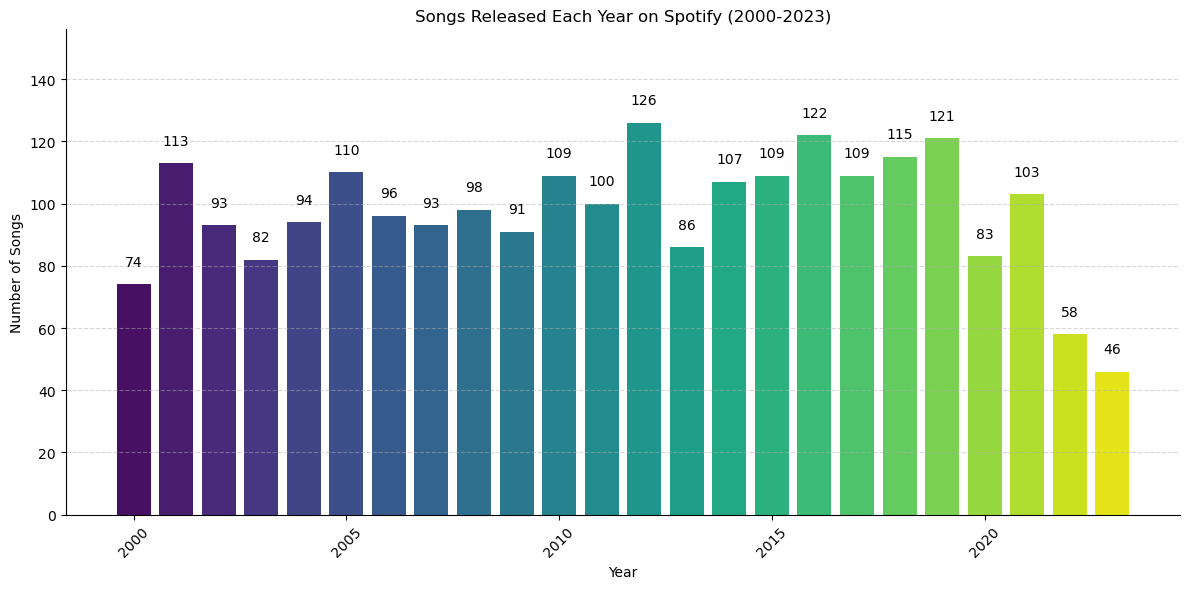

In [3]:
# Count the number of songs released each year on Spotify
song_counts = df['year'].value_counts().sort_index()

# Create a color palette for the plot
colors = sns.color_palette('viridis', len(song_counts))

# Create a bar plot with customized styles
plt.figure(figsize=(12, 6))
plt.bar(song_counts.index, song_counts.values, color=colors)

# Add custom annotations to the bars
for i, count in enumerate(song_counts.values):
    plt.text(song_counts.index[i], count + 5, str(count), ha='center', va='bottom')

# Customize the plot aesthetics
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Songs Released Each Year on Spotify (2000-2023)')
plt.xticks(rotation=45)
plt.ylim(0, max(song_counts.values) + 30)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

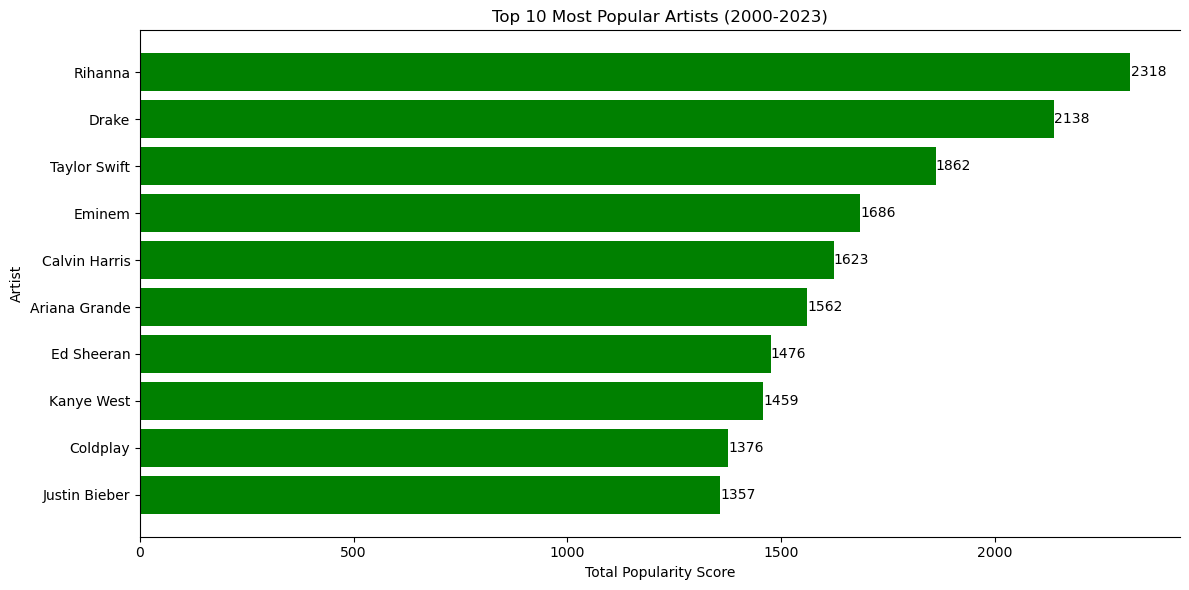

In [4]:
# Group by artist and calculate the average popularity
artist_popularity = df.groupby('artist')['popularity'].sum().sort_values(ascending=False)

# Select the top 10 most popular artists
top_10_artists = artist_popularity.head(10)

# Create a bar plot to visualize the popularity of the top 10 artists
plt.figure(figsize=(12, 6))
plt.barh(top_10_artists.index, top_10_artists.values, color='green')

# Add labels to the bars
for i, popularity in enumerate(top_10_artists.values):
    plt.text(popularity + 0.2, i, str(round(popularity, 2)), va='center')

# Customize the plot aesthetics
plt.xlabel('Total Popularity Score')
plt.ylabel('Artist')
plt.title('Top 10 Most Popular Artists (2000-2023)')

# Invert the y-axis for better visualization
plt.gca().invert_yaxis()

# Remove the right spine
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

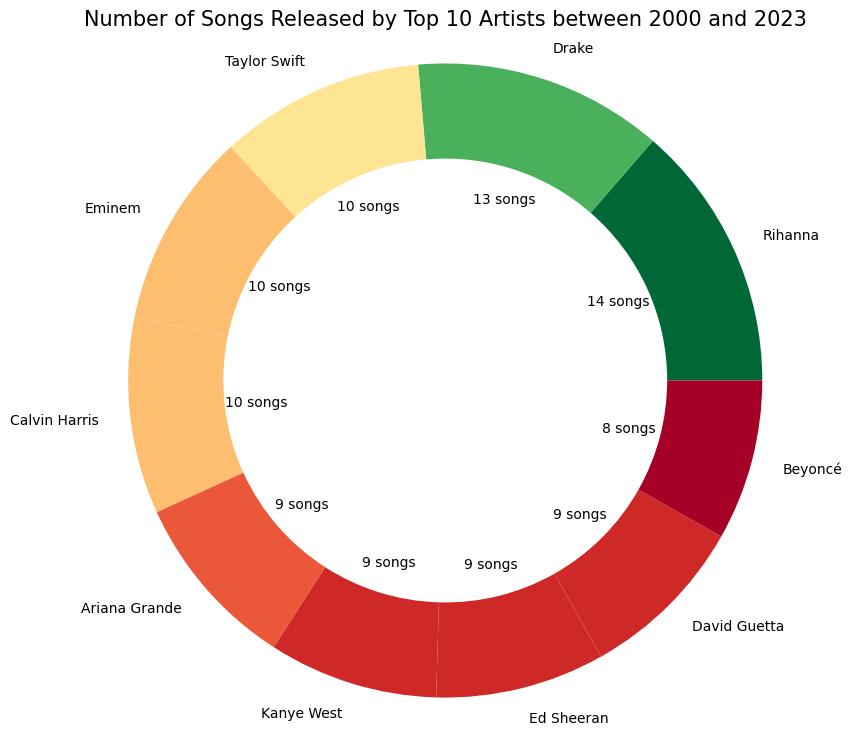

In [5]:
# Assuming your dataset is stored in a DataFrame called 'df'
top_10_artists = df.groupby('artist').size().reset_index(name='num_songs')
top_10_artists = top_10_artists.sort_values(by='num_songs', ascending=False).head(10)

# Generate color gradient from red to green based on the number of songs
min_value = top_10_artists['num_songs'].min()
max_value = top_10_artists['num_songs'].max()
colors = plt.cm.RdYlGn(np.linspace(0, 1, max_value - min_value + 1))

# Create a donut plot with custom colors
plt.figure(figsize=(9, 9))
plt.pie(top_10_artists['num_songs'], labels=top_10_artists['artist'], colors=colors[top_10_artists['num_songs'] - min_value],
        autopct=lambda pct: f'{pct:.0f} songs', startangle=360, wedgeprops=dict(width=0.3))
plt.axis('equal')  # Equal aspect ratio ensures a circular shape
plt.title('Number of Songs Released by Top 10 Artists between 2000 and 2023', fontsize=15)
# plt.legend(loc='upper right')
plt.show()

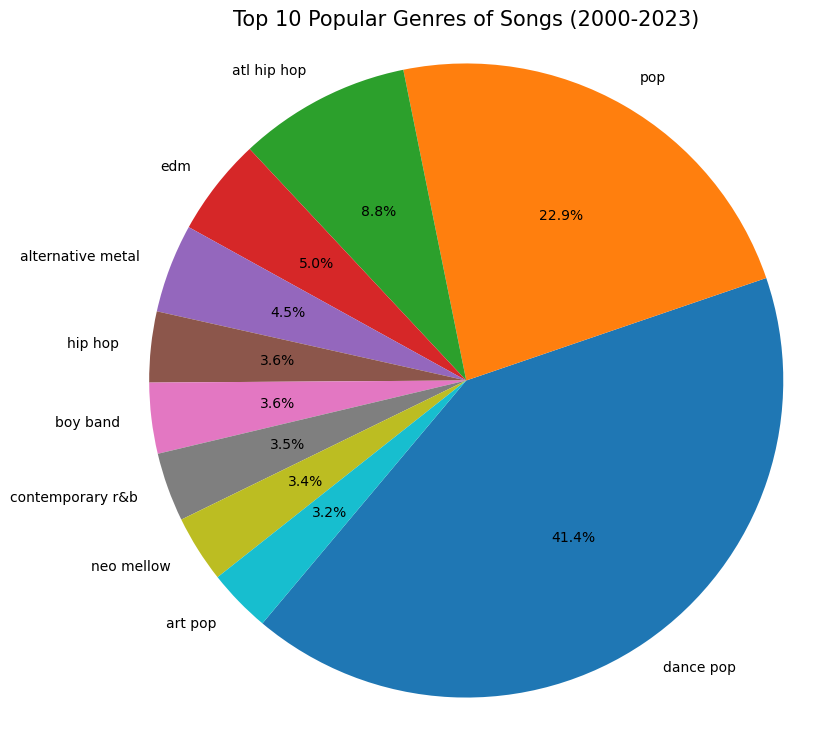

In [6]:
# Count the frequency of each genre
genre_counts = df["top genre"].value_counts().head(10)

# Plot the pie chart
plt.figure(figsize=(9, 9))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=230)
plt.title("Top 10 Popular Genres of Songs (2000-2023)", fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

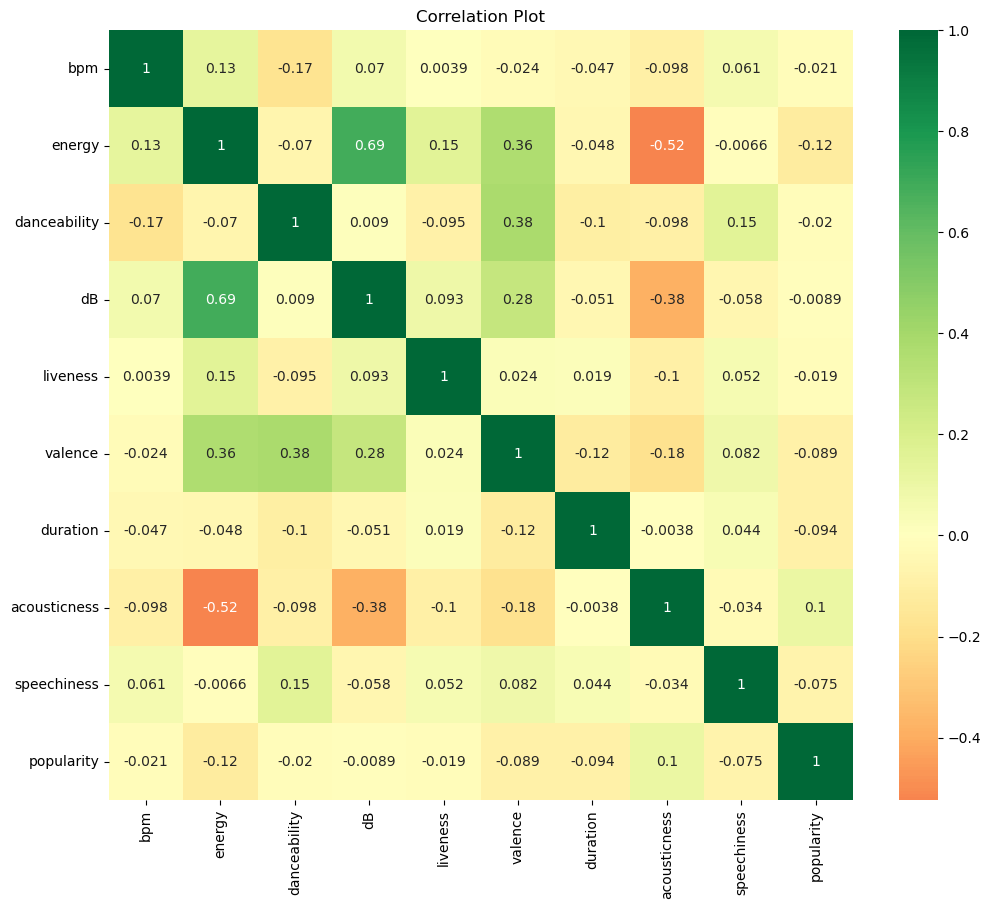

In [7]:
# Select the relevant columns (excluding "year")
columns = ['bpm', 'energy', 'danceability', 'dB', 'liveness', 'valence', 'duration', 'acousticness', 'speechiness', 'popularity']

# Calculate the correlation matrix
correlation_matrix = df[columns].corr()

# Generate a correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0)
plt.title("Correlation Plot")
plt.show()

# Observation:
**A noticeable correlation is observed between the loudness (dB) and energy of the songs i.e. 0.69. This suggests that there is a tendency for louder songs to be more energetic.**

In [8]:
df['popularity']

0       98
1       97
2       96
3       96
4       96
        ..
2380    21
2381    16
2382    15
2383    11
2384     5
Name: popularity, Length: 2338, dtype: int64

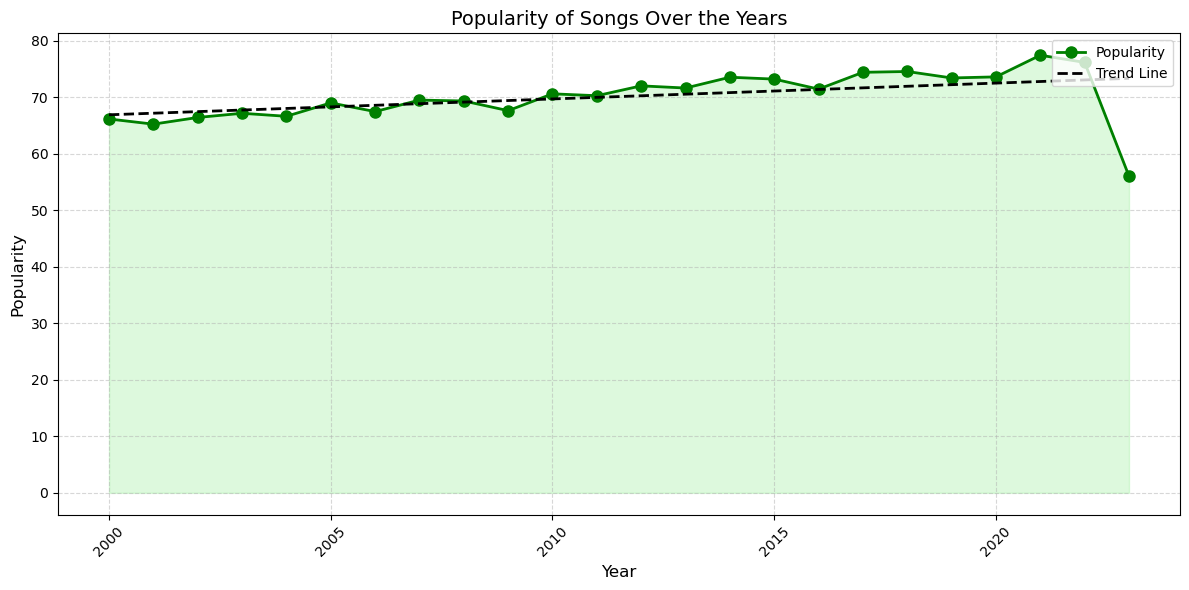

In [9]:
# Group the dataset by year and calculate the average popularity for each year
popularity_by_year = df.groupby('year')['popularity'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(popularity_by_year['year'], popularity_by_year['popularity'], marker='o', color='green', linewidth=2, markersize=8)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Popularity of Songs Over the Years', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Add a trend line
z = np.polyfit(popularity_by_year['year'], popularity_by_year['popularity'], 1)
p = np.poly1d(z)
plt.plot(popularity_by_year['year'], p(popularity_by_year['year']), color='black', linestyle='--', linewidth=2)

# Customize the plot aesthetics
plt.fill_between(popularity_by_year['year'], popularity_by_year['popularity'], color='lightgreen', alpha=0.3)
plt.legend(['Popularity', 'Trend Line'], loc='upper right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

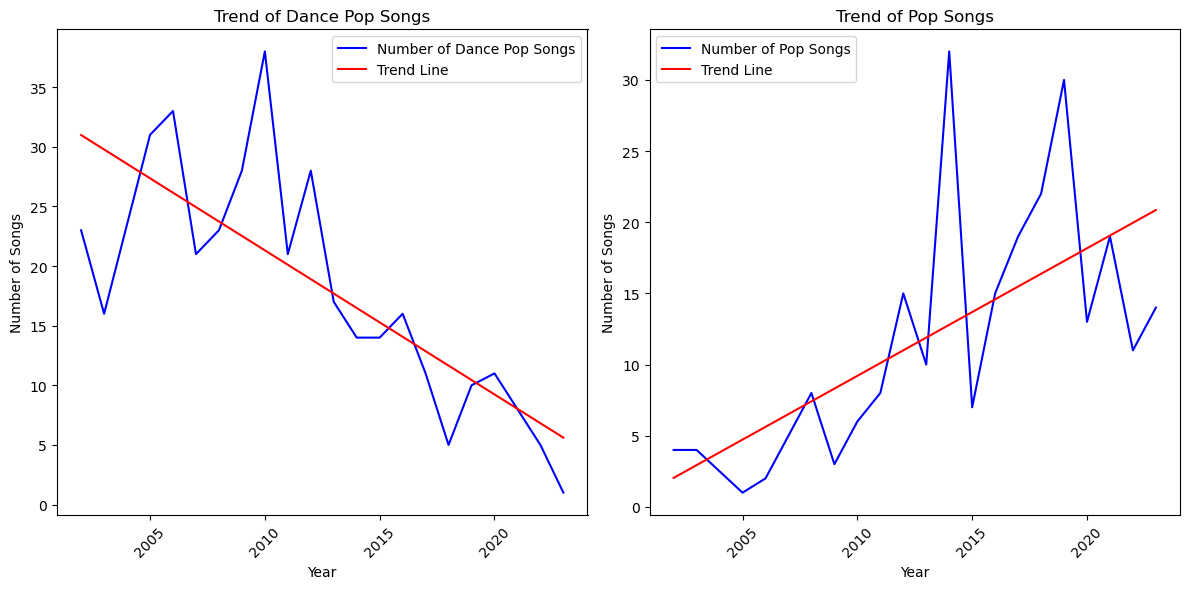

In [10]:
# Filter the DataFrame to include only dance pop songs
dance_pop_songs = df[df['top genre'] == 'dance pop']

# Count the occurrences of dance pop songs for each year
dance_pop_counts = dance_pop_songs['year'].value_counts().sort_index()

# Filter the DataFrame to include only pop songs
pop_songs = df[df['top genre'] == 'pop']

# Count the occurrences of pop songs for each year
pop_counts = pop_songs['year'].value_counts().sort_index()

# Determine the common years between dance pop and pop songs
common_years = dance_pop_counts.index.intersection(pop_counts.index)

# Calculate the trend lines for dance pop and pop songs using numpy
dance_pop_trend_line = np.poly1d(np.polyfit(common_years, dance_pop_counts[common_years], 1))(common_years)
pop_trend_line = np.poly1d(np.polyfit(common_years, pop_counts[common_years], 1))(common_years)

# Plot the song count by year for dance pop songs with the trend line
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(common_years, dance_pop_counts[common_years], 'b-', label='Number of Dance Pop Songs')
plt.plot(common_years, dance_pop_trend_line, 'r-', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Trend of Dance Pop Songs')
plt.xticks(rotation=45)
plt.legend()

# Plot the song count by year for pop songs with the trend line
plt.subplot(1, 2, 2)
plt.plot(common_years, pop_counts[common_years], 'b-', label='Number of Pop Songs')
plt.plot(common_years, pop_trend_line, 'r-', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Trend of Pop Songs')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
